In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
a=pd.read_csv('kc_house_data.csv')
a.dropna()
a['last year updated']=a[['yr_renovated','yr_built']].max(axis=1)
del(a['yr_renovated'])
del(a['sqft_lot15'])
del(a['yr_built'])
del(a['sqft_living15'])
del(a['long'])
del(a['lat'])
del(a['zipcode'])
del(a['sqft_basement'])
del(a['sqft_above'])
del(a['sqft_lot'])
del(a['sqft_living'])
del(a['bathrooms'])
del(a['bedrooms'])
del(a['date'])
a=a.set_index(['id'])
a=a.sort_index()
a=a.astype(int)
def fastfunction(x):
    n=(a[[x,"price"]].groupby([x], as_index=True).mean())
    n=n.astype(int)
    return(n)
a

,price,floors,waterfront,view,condition,grade,last year updated
id,,,,,,,
1000102,300000,2,0,0,3,7,1991
1000102,280000,2,0,0,3,7,1991
1200019,647500,1,0,0,4,8,1947
1200021,400000,1,0,0,3,7,1952
2800031,235000,1,0,0,4,6,1930
...,...,...,...,...,...,...,...
9842300095,365000,1,0,0,3,7,1927
9842300485,380000,1,0,0,5,7,1939
9842300540,339000,1,0,0,4,7,1942


In [76]:
fastfunction('floors')
#not accurate
del(a['floors'])
    


In [77]:
fastfunction('condition')
#accurate

,price
condition,
1,334431
2,327287
3,542012
4,521200
5,612418


In [78]:
fastfunction('last year updated')
#accurate

,price
last year updated,
1900,575054
1901,545933
1902,648488
1903,496036
1904,586155
...,...
2011,550246
2012,533387
2013,676387


In [79]:
fastfunction('grade')
#accurate

,price
grade,
1,142000
3,205666
4,214381
5,248523
6,301919
7,402590
8,542852
9,773513
10,1071771


In [80]:
fastfunction('waterfront')
#accurate

,price
waterfront,
0,531563
1,1661876


In [84]:
fastfunction('view')
#accurate
a

,price,waterfront,view,condition,grade,last year updated
id,,,,,,
1000102,300000,0,0,3,7,1991
1000102,280000,0,0,3,7,1991
1200019,647500,0,0,4,8,1947
1200021,400000,0,0,3,7,1952
2800031,235000,0,0,4,6,1930
...,...,...,...,...,...,...
9842300095,365000,0,0,3,7,1927
9842300485,380000,0,0,5,7,1939
9842300540,339000,0,0,4,7,1942


MSE 83214741563.19562
R squared 0.4402881674013932


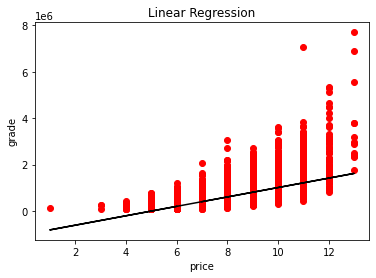

MSE 135856380927.07643
R squared 0.08621450345836723


ValueError: x and y must be the same size

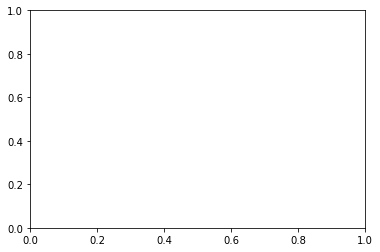

In [112]:
x=a[["grade"]] 
y=a[["price"]].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40)
model=LinearRegression() 
model.fit(x_train,y_train)
predicted=model.predict(x_test) 
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))
plt.scatter(x,y,color="r")
plt.title("Linear Regression")
plt.xlabel("price")
plt.ylabel("grade")
plt.plot(x,model.predict(x),color="k")
plt.show()
n=a[["waterfront","condition"]]  #we have more than one input
m=a["price"].values
n_train,n_test,m_train,m_test=train_test_split(n,m,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(n_train,m_train) #fitting the training data
predicted=model.predict(n_test) #testing our model’s performance

print("MSE", mean_squared_error(m_test,predicted))
print("R squared", metrics.r2_score(m_test,predicted))
plt.scatter(n,m,color="r")
plt.title("multiLinear Regression")
plt.xlabel("price")
plt.ylabel("grade")
plt.plot(n,model.predict(n),color="k")
plt.show()